In [65]:
#Import the packages
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC , NuSVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics  
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot as plt
import os 
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import cross_val_score
import pylab as pl
import pandas as pd
from sklearn.utils.multiclass import unique_labels

In [58]:
def load_dataset():
    load = sio.loadmat('features(10)_cwt')
    features = np.array(load['features'])
    print(features.shape)
    load = sio.loadmat('SC4001E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = b[800:1633,1]
    load = sio.loadmat('SC4011E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4012E0-PSG_hyp.mat') 
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4021E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4022E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4031E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4032E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4041E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4042E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4051E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    print(max(labels))
    labels = np.where(labels==4,3,labels)
    labels = np.where(labels==6,0,labels)
    labels = np.where(labels==5,4,labels)
    #print(len(np.where(labels==1)[0]))
    #print(max(labels))
    feat = features[800:1633,:]
    #print(feat.shape)
    for i in range (1,10):
        feat =  np.append(features[800+i*1633:1633+i*1633,:],feat,axis=0) 
    print(feat.shape)
    return feat, labels

In [ ]:
perceptron = sklearn.linear_model.Perceptron(penalty='l2',)

In [396]:
def svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param):
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    if use_preset_param==False:
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=i)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number: ", i)
        plt.figure(figsize=(12, 6))  
        plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs gamma Value')  
        plt.xlabel('gamma Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        gamma = (np.argmax(acc)+1)/1
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=gamma,C=i/10)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number: ", i)
        plt.figure(figsize=(12, 6)) 
        plt_x = np.linspace(0.1,1.9,num=19)
        plt.plot(plt_x, acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs C Value')  
        plt.xlabel('C Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        C = (np.argmax(acc)+1)/10
        svclassifier = SVC(kernel='rbf',gamma=gamma,C=C)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
        print(gamma,C)
    elif use_preset_param==True:
        svclassifier = SVC(kernel='rbf',cache_size=1000,gamma=3,C=1)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
    return svclassifier , y_pred   

(16330, 7)
6
(8330, 7)
iteration number:  1
iteration number:  2
iteration number:  3
iteration number:  4
iteration number:  5
iteration number:  6
iteration number:  7
iteration number:  8
iteration number:  9
iteration number:  10
iteration number:  11
iteration number:  12
iteration number:  13
iteration number:  14
iteration number:  15
iteration number:  16
iteration number:  17
iteration number:  18
iteration number:  19
iteration number:  1
iteration number:  2
iteration number:  3
iteration number:  4
iteration number:  5
iteration number:  6
iteration number:  7
iteration number:  8
iteration number:  9
iteration number:  10
iteration number:  11
iteration number:  12
iteration number:  13
iteration number:  14
iteration number:  15
iteration number:  16
iteration number:  17
iteration number:  18
iteration number:  19
3.0 1.0
Accuracy: 0.5294117647058824
[[ 82   0  66   5   3]
 [  6   2  52   1   2]
 [ 24   1 325   6   9]
 [ 10   1  71  14   4]
 [  5   0 122   4  18]]
      

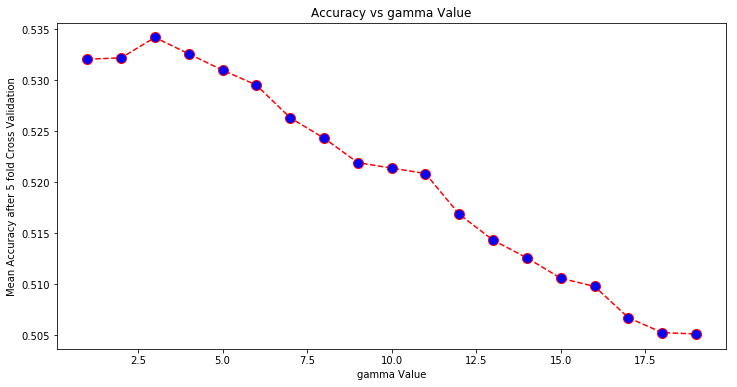

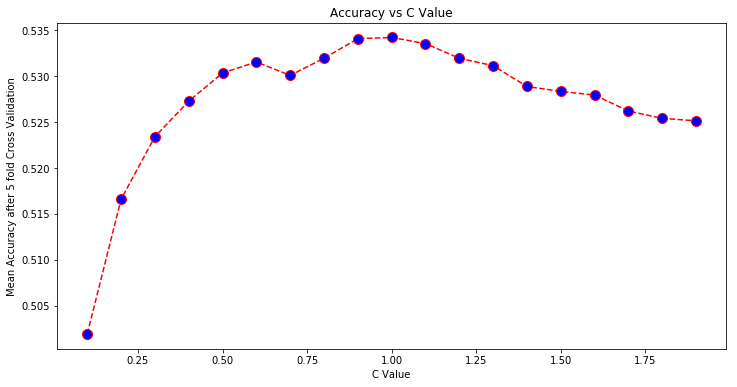

In [397]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
#set use_preset_param to False to view the results of cross-validation of hyperparameters
svclassifier, y_pred = svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param=False)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))

Confusion matrix, without normalization
[[ 82   0  66   5   3]
 [  6   2  52   1   2]
 [ 24   1 325   6   9]
 [ 10   1  71  14   4]
 [  5   0 122   4  18]]
Normalized confusion matrix
[[0.53 0.   0.42 0.03 0.02]
 [0.1  0.03 0.83 0.02 0.03]
 [0.07 0.   0.89 0.02 0.02]
 [0.1  0.01 0.71 0.14 0.04]
 [0.03 0.   0.82 0.03 0.12]]


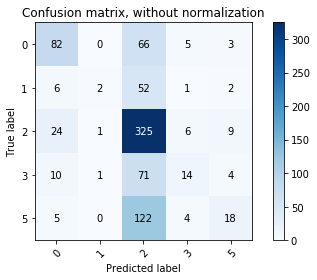

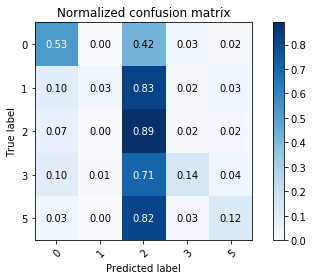

In [391]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = [0,1,2,3,5]
class_names = np.array(class_names)
class_names = class_names.astype(int)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

(16330, 7)
6
(8330, 7)
0.525821704583673
(array([21], dtype=int64),)
Accuracy: 0.4717887154861945


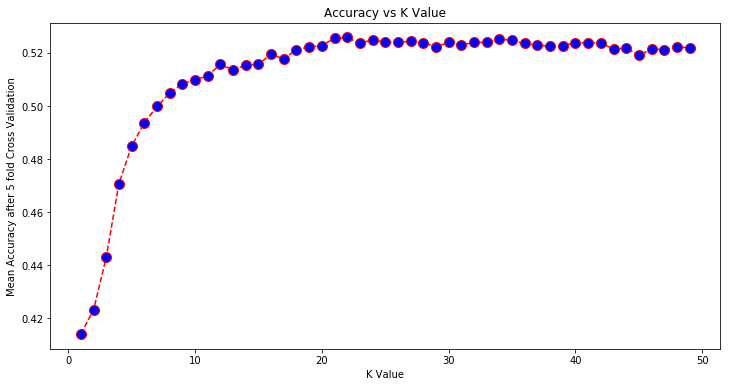

In [46]:
feat, labels = load_dataset()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(x_train, y_train)
    #pred_i = knn.predict(x_test)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    error.append(np.mean(scores))
    #print("err=", np.mean(pred_i != y_test))
    #print("Accuracy:",metrics.accuracy_score(pred_i, y_pred))
    #print(metrics.confusion_matrix(y_test, pred_i))  
    #print(metrics.classification_report(y_test, pred_i))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
print(max(error))
print(np.where(error==max(error)))
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
pred_i = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(pred_i, y_pred))